# Probability II: Continuous Distributions I

<i>Patrick White</i></br>
<i>Dec 09, 2024</i>

<img src="img/pd2.png" style="height: 350px; width:auto;">

# Outline

- Beta
- Dirichlet
- Uniform
- Von Mises
- Normal
- Half-Normal
- Multivariate Normal
- Log-Normal
- Student’s T-Distribution
- Cauchy
- Half-Cauchy
- What’s Next?

The previous article introduced random variables as quantities that can take on a range of values, with probabilities assigned to the potential outcomes. It introduced discrete distributions as having positive, integer-valued outcomes that can be represented by a probability mass function (PMF), for which the sum of bars constitutes the cumulative distribution function (CDF). This article is the first of two about continuous distributions, represented by an infinite number of points along an unbroken line, and therefore a probability density function (PDF), for which the integral is the CDF.

For the sake of consistency, and to avoid contributing to the proliferation of alternative symbols and notations, I have aligned with https://distribution-explorer.github.io/ for mathematical conventions, unless alternatives were found to be most common overall. The visuals are sourced from the PyMC user documentation, which provides the code to generate them as well.

# Beta

The Beta distribution is a continuous distribution on the interval $[0,1]$. As such, it is dubbed the probability distribution for probabilities, such as the p parameter in a Bernoulli or Binomial. Within the $[0,1]$ range, it’s shape is quite flexible, for example:

- Flat (Uniform) if $\alpha=1$ and $\beta=1$

- Unimodal and symmetric if $\alpha=\beta$ and both are greater than $1$

- Unimodal and asymmetric if $\alpha \gt 1$ and $\beta \gt 1$, but $\alpha \neq \beta$

    - Favoring values greater than $0.5$ if $\alpha \gt \beta$

    - Favoring values lower than $0.5$ if $\beta \gt 1$

- U-shaped opening upward if $\alpha \lt 1$ and $\beta \lt 1$

#### PDF Parameterization #1:

$f(y; \alpha, \beta) = \frac{ \Gamma(\alpha + \beta) }{ \Gamma(\alpha) \Gamma(\beta) } y^{\alpha-1} (1-y)^{\beta-1}, ~~y \in (0,1)$

$\Gamma$ is the Gamma function, which is

$\begin{align} \Gamma(x) = \int_0^\infty\mathrm{d}t\,t^{x-1}\mathrm{e}^{-t}. \end{align}$

and, if $n$ is a positive integer, reduces to 

$\Gamma(n) = (n-1)!$

#### PDF Parameterization #2:

$f(y; \alpha, \beta) = \frac{y^{\alpha-1}(1-y)^{\beta-1}}{B(\alpha, \beta)}$

where $B(\alpha, \beta)$ is the Beta function,

$B(x, y) = \frac{\Gamma(x)\Gamma(y)}{\Gamma(x + y)}$

In both of the above parameterizations, the expected value is

$\mu = \frac{\alpha}{\alpha + \beta}$

and the variance is 

$\frac{ \mu(1-\mu) }{ \alpha + \beta+1 }$

<img src="https://www.pymc.io/projects/docs/en/stable/_images/pymc-Beta-1.png" style="height: 300px; width:auto;">

<i>https://www.pymc.io/projects/docs/en/stable/api/distributions/generated/pymc.Beta.html</i>

The conjugate prior for the Beta distribution is itself the Beta distribution.

# Dirichlet

The Dirichlet is a multivariate generalization of the Beta, where instead of describing the probability of one of two outcomes (a Bernoulli trial), it describes the probability of $K$ outcomes. The Beta distribution arises when $K=2$.

#### PDF:

$f(\mathbf{\theta};\mathbf{\alpha}) = \frac{1}{B(\mathbf{\alpha})}\,\prod_{i=1}^K ~\theta_i^{\alpha_i-1}$

The expected value is 

$\left<\theta_i\right> = \displaystyle{\frac{\alpha_i}{\sum_{i=k}^K \alpha_k}}$

and the variance is 

$\displaystyle{\frac{\left<\theta_i\right>(1-\left<\theta_i\right>)}{1 + \sum_{k=1}^K \alpha_k}}$

# Uniform

As mentioned above, the Uniform is a special case of the Beta where $\alpha=1$ and $\beta=1$. For a Uniform distribution, the probability of a draw from any interval within the interval is proportional to the length of the interval.

#### PDF:

$f(y;\alpha, \beta) = \left\{\begin{array}{ccl}\displaystyle{\frac{1}{\beta-\alpha}}&&\alpha\le y\le\beta\\[0.5em] 0 && \text{otherwise}\end{array}\right.$

The expected value is 

$\displaystyle{\frac{\alpha + \beta}{2}}$

and the variance is 

$\displaystyle{\frac{(\beta - \alpha)^2}{12}}$

<img src="https://www.pymc.io/projects/docs/en/stable/_images/pymc-Uniform-1.png" style="height: 300px; width:auto;">

<i>https://www.pymc.io/projects/docs/en/stable/api/distributions/generated/pymc.Uniform.html</i>

# Von Mises

The Von Mises distribution is a random variable that lives on a circular domain, making it uniquely qualified for applications involving time, but also useful toward things such as particle motion.

#### PDF:

$f(y;\mu, \kappa) = \frac{\mathrm{e}^{-\kappa\cos(y-\mu)}}{2\pi I_0(\kappa)}$

where $I_0$ is the modified Bessel function of order $0$:

$I_\alpha(x) = \frac{1}{\pi}\int_0^\pi\,\mathrm{d}\theta\,\cos(\alpha\theta)\,\mathrm{e}^{x\cos\theta}$

The expected value is simply \mu, and the variance is 

$\displaystyle{1 - \frac{I_1(\kappa)}{I_0(\kappa)}}$

<img src="https://www.pymc.io/projects/docs/en/stable/_images/pymc-VonMises-1.png" style="height: 300px; width:auto;">

<i>https://www.pymc.io/projects/docs/en/stable/api/distributions/generated/pymc.VonMises.html</i>

The conjugate prior to the Von Mises is itself a Von Mises.

# Normal

The Normal distribution is unimodal and symmetric, making the mean, median, and mode equal to each other. For a unimodal and symmetric distribution parameterized in terms of mean and variance, the Normal maximizes entropy, the spread of uncertainty or randomness in a system. 

As a consequence, the Normal distribution naturally arises under conditions of additive error or processes. Famously, if errors are additive and independent, the central limit theorem (CLT) tells us that large samples and mixes of distributions will tend to produce a Normal distribution. A Normal distribution with mean $\mu=0$ and variance $\sigma^2 = 1$ (which corresponds to a standard deviation of $\sigma=1$) is referred to as the standard Normal distribution, which provides the familiar heuristic that $95\%$ of data lies between $-1.96$ and $1.96$ standard deviations from the mean.

CLT aside, there are several relationships the Normal has mathematically with others:

- The Beta when $\alpha$ and $\beta$ are large

- The Binomial when $n$ is large and $p$ is neither close to $0$ nor $1$

- The Poisson when $\lambda$ is large

- The Student-t when degrees of freedom $\nu$ is large

The logarithm of the Normal is a parabola-shaped function of $y$ centered at $\mu$, highlighting that it penalizes error quadratically. The exponentiation of a Normal is (perhaps unintuitively) called the Log-Normal distribution.

Sometimes, like when expressing the conjugate-prior relationship of the Normal to itself using known variance, we refer to variance in terms of a reparameterization called precision $\tau$. 

$\tau=\frac{1}{\sigma^2}$

#### PDF:

$f(y;\mu, \sigma) = \sqrt{\frac{2}{\pi\sigma^2}}\,\mathrm{e}^{-(y-\mu)^2/2\sigma^2}$

The expected value is $\mu$ and the variance is $\sigma^2$.

The short answer to why $\pi$ appears is because 

$\int_{-\infty}^{\infty} e^{-x^2} dx = \sqrt{\pi}$

But for a more satisfying and visual explanation, there is this <a href="https://www.3blue1brown.com/lessons/gaussian-integral">3Blue1Brown</a> video.

<img src="https://www.pymc.io/projects/docs/en/stable/_images/pymc-Normal-1.png" style="height: 300px; width:auto;">

<i>https://www.pymc.io/projects/docs/en/stable/api/distributions/generated/pymc.Normal.html</i>

The conjugate prior to a Normal is Normal if variance is known, and a combination of Normal and Inverse-Gamma if variance is unknown.

# Half-Normal

The Half-Normal distribution is a truncated and renormalized version of the Normal, restricted to only positive values, where the mode and minimum is zero.

#### PDF:

$f(y;\mu, \sigma) = \sqrt{\frac{2}{\pi\sigma^2}}\,\mathrm{e}^{-(y-\mu)^2/2\sigma^2}$

The expected value is 

$\displaystyle{\mu + \sqrt{\frac{2\sigma^2}{\pi}}}$

And the variance is 

$\displaystyle{\left(1 - \frac{2}{\pi}\right)\sigma^2}$

<img src="https://www.pymc.io/projects/docs/en/stable/_images/pymc-HalfNormal-1.png" style="height: 300px; width:auto;">

<i>https://www.pymc.io/projects/docs/en/stable/api/distributions/generated/pymc.HalfNormal.html</i>

# Multivariate Normal

The Multivariate Normal (MVN) distribution is a generalization of the Normal to higher dimensions. The marginals of an MVN are themselves normally distributed. It is parameterized by a mean vector $\mu$ and covariance matrix $\mathbf{\Sigma}$. If $\mathbf{\Sigma} = \sigma 2 \mathbf{I}$ (where $\mathbf{I}$ is the identity matrix) then the distribution is spherically symmetric.

#### PDF:

$f(\mathbf{y};\boldsymbol{\mu}, \mathsf{\Sigma}) = \frac{1}{\sqrt{(2\pi)^K |\mathsf{\Sigma}|}}\,\exp\left[-\frac{1}{2}(\mathbf{y} - \boldsymbol{\mu})^\mathsf{T} \cdot \mathsf{\Sigma}^{-1} \cdot (\mathbf{y} - \boldsymbol{\mu})\right]$

The expected value is 

$E[y_i] = \mu_i$

And the variance is 

$Var[y_i] = \Sigma_{ii}$.

The covariance is 

$Cov[y_i, y_j] = \Sigma_{ij}$

The conjugate prior for the multivariate Gaussian distribution is a Normal-Inverse-Wishart distribution if both the mean and covariance are unknown. The <a href="https://en.wikipedia.org/wiki/Normal-inverse-Wishart_distribution">Wishart distribution</a> is a distribution over all positive semi-definite matrices, which applies to proper covariance matrices.

We’ll plot this one using Scipy to get a visual:

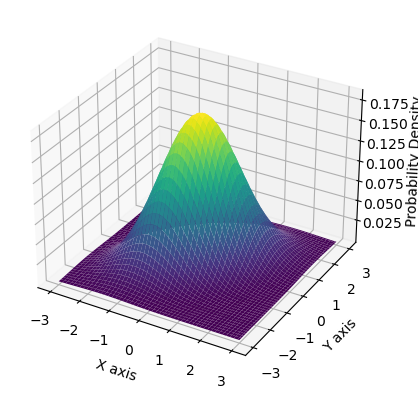

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Parameters for the bivariate normal distribution
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]  # Diagonal covariance

# Create grid and multivariate normal
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rv = multivariate_normal(mean, cov)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = rv.pdf(pos)
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Probability Density')
plt.show()

# Log-Normal

The exponentiation of a Normal distribution follows a Log-Normal distribution, and so the logarithm of a Log-Normal distribution follows a Normal distribution. Whereas the Normal distribution reflects additive error or processes, the Log-Normal distribution reflects multiplicative error or processes because of the property that $ln(ab) = ln(a) + ln(b)$. Thus, the Log-Normal distribution can arise quite naturally, or as the result of logarithmic transforms, which are often performed for convenience.

#### PDF:

$f(y;\mu, \sigma) = \frac{1}{y\sqrt{2\pi\sigma^2}}\,\mathrm{e}^{-(\ln y-\mu)^2/2\sigma^2}$

The expected value is 

$\displaystyle{\mathrm{e}^{\mu + \sigma^2/2}}, \nu \gt 1$

And the variance is 

$\left(\mathrm{e}^{\sigma^2} - 1\right)\mathrm{e}^{2\mu + \sigma^2}$

<img src="https://www.pymc.io/projects/docs/en/latest/_images/pymc-LogNormal-1.png" style="height: 300px; width:auto;">

<i>https://www.pymc.io/projects/docs/en/latest/api/distributions/generated/pymc.LogNormal.html</i>

# Student’s T-Distribution

The t-distribution arises when sampling from data that are approximately Gaussian, though compared to the standard Normal, it has wider tails and taller shoulders. The standard t-distribution is parameterized only in terms of degrees of freedom $\nu$, but the parameterization more commonly found in software incorporates location and scale.

#### PDF:

$\begin{align} f(y;\nu, \mu, \sigma) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)\sqrt{\pi \nu \sigma^2}}\left(1 + \frac{(y-\mu)^2}{\nu \sigma^2}\right)^{-\frac{\nu + 1}{2}}, \end{align}$

The expected value is 

$\mu, ~\nu \gt 1$

and the variance is 

$\displaystyle{\frac{\nu}{\nu - 2}}\,\sigma^2, \nu \gt 2$

<img src="https://www.pymc.io/projects/docs/en/stable/_images/pymc-StudentT-1.png" style="height: 300px; width:auto;">

<i>https://www.pymc.io/projects/docs/en/stable/api/distributions/generated/pymc.StudentT.html</i>

# Half Student-T

Like the Half-Normal, the Half Student-T distribution is truncated to only outcomes greater than the location of the peak.

#### PDF:

$f(y;\nu, \mu, \sigma) =
\frac{2\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)\sqrt{\pi \nu \sigma^2}}\left(1 + \frac{(y-\mu)^2}{\nu \sigma^2}\right)^{-\frac{\nu + 1}{2}}$

The expected value is 

$\mu + 2\sigma\sqrt{\frac{\nu}{\pi}}\,\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)(\nu-1)}$

and the variance is 

$\sigma^2\left(\frac{\nu}{\nu - 2}-\frac{4\nu}{\pi(\nu-1)^2}\left(\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)}\right)^2\right)$

<img src="https://www.pymc.io/projects/docs/en/latest/_images/pymc-HalfStudentT-1.png" style="height: 300px; width:auto;">

<i>https://www.pymc.io/projects/docs/en/latest/api/distributions/generated/pymc.HalfStudentT.html</i>

# Cauchy

The Cauchy distribution is a t-distribution with one degree of freedom. This has some special properties. It has a peak at $\mu$, but the first and second moments (mean and variance) are undefined due to an integral that does not decay rapidly enough to produce a finite result. So the mean is undefined, and the variance is infinite.

#### PDF:

$f(y;\mu,\sigma) = \frac{1}{\pi \sigma}\,\frac{1}{1 + (y-\mu)^2/\sigma^2}$

<img src="https://www.pymc.io/projects/docs/en/stable/_images/pymc-Cauchy-1.png" style="height: 300px; width:auto;">

<i>https://www.pymc.io/projects/docs/en/stable/api/distributions/generated/pymc.Cauchy.html</i>

# Half-Cauchy

Last one, before the next article. The Half-Cauchy is to the Cauchy what the Half-Normal is to the Normal, etc. It provides a nice option when wanting to work with a t-distribution of enormously high variance that is constrained to positive values only. As with the Cauchy, the first and second moments are not defined.

$f(y;\mu, \sigma) = \frac{2}{\pi \sigma}\,\frac{1}{1 + (y-\mu)^2/\sigma^2}$

<img src="https://www.pymc.io/projects/docs/en/stable/_images/pymc-HalfCauchy-1.png" style="height: 300px; width:auto;">

<i>https://www.pymc.io/projects/docs/en/stable/api/distributions/generated/pymc.HalfCauchy.html</i>

# What’s Next?

You may have noticed the absence of familiar names like the Gamma and Exponential. These are the subject of the final article in the series, regarding a second ‘family’ of commonly used continuous distributions, coming up next.

# References

- (n.d.). Distribution Explorer. https://distribution-explorer.github.io/index.html

- (n.d.). PyMC API. Distributions. https://www.pymc.io/projects/docs/en/stable/api/distributions.html

- Blitzstein, J. (2019). Introduction to Probability (2nd ed.). Harvard University and Stanford University. https://drive.google.com/file/d/1VmkAAGOYCTORq1wxSQqy255qLJjTNvBI/view